In [1]:
import torch
model, alphabet = torch.hub.load("facebookresearch/esm:main", "esm2_t33_650M_UR50D")

Downloading: "https://github.com/facebookresearch/esm/zipball/main" to /home/s1032532/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t33_650M_UR50D.pt" to /home/s1032532/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t33_650M_UR50D-contact-regression.pt" to /home/s1032532/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D-contact-regression.pt


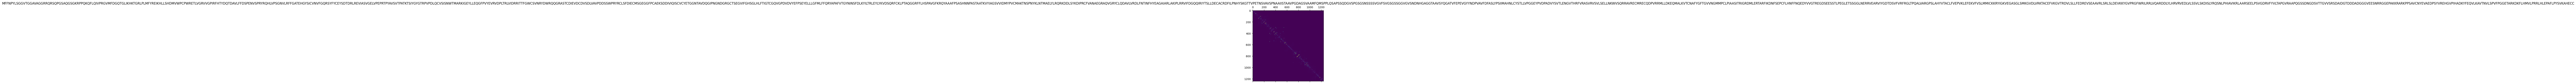

In [9]:
import torch
import esm

# Load ESM-2 model
model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results

# Prepare data (first 2 sequences from ESMStructuralSplitDataset superfamily / 4)
#data = [
#    ("protein1", "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"),
#    ("protein2", "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
#    ("protein2 with mask","KALTARQQEVFDLIRD<mask>ISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
#    ("protein3",  "K A <mask> I S Q"),
#]
data = [("protein1", "MFFNPYLSGGVTGGAVAGGRRQRSQPGSAQGSGKRPPQKQFLQIVPRGVMFDGQTGLIKHKTGRLPLMFYREIKHLLSHDMVWPCPWRETLVGRVVGPIRFHTYDQTDAVLFFDSPENVSPRYRQHLVPSGNVLRFFGATEHGYSICVNVFGQRSYFYCEYSDTDRLREVIASVGELVPEPRTPYAVSVTPATKTSIYGYGTRPVPDLQCVSISNWTMARKIGEYLLEQGFPVYEVRVDPLTRLVIDRRITTFGWCSVNRYDWRQQGRASTCDIEVDCDVSDLVAVPDDSSWPRYRCLSFDIECMSGEGGFPCAEKSDDIVIQISCVCYETGGNTAVDQGIPNGNDGRGCTSEGVIFGHSGLHLFTIGTCGQVGPDVDVYEFPSEYELLLGFMLFFQRYAPAFVTGYNINSFDLKYILTRLEYLYKVDSQRFCKLPTAQGGRFFLHSPAVGFKRQYAAAFPSASHNNPASTAATKVYIAGSVVIDMYPVCMAKTNSPNYKLNTMAELYLRQRKDDLSYKDIPRCFVANAEGRAQVGRYCLQDAVLVRDLFNTINFHYEAGAIARLAKIPLRRVIFDGQQIRIYTSLLDECACRDFILPNHYSKGTTVPETNSVAVSPNAAIISTAAVPGDAGSVAAMFQMSPPLQSAPSSQDGVSPGSGSNSSSSVGVFSVGSGSSGGVGVSNDNHGAGGTAAVSYQGATVFEPEVGYYNDPVAVFDFASLYPSIIMAHNLCYSTLLVPGGEYPVDPADVYSVTLENGVTHRFVRASVRVSVLSELLNKWVSQRRAVRECMRECQDPVRRMLLDKEQMALKVTCNAFYGFTGVVNGMMPCLPIAASITRIGRDMLERTARFIKDNFSEPCFLHNFFNQEDYVVGTREGDSEESSTLPEGLETSSGGLNERRVEARVIYGDTDSVFVRFRGLTPQALVARGPSLAHYVTACLFVEPVKLEFEKVFVSLMMICKKRYIGKVEGASGLSMKGVDLVRKTACEFVKGVTRDVLSLLFEDREVSEAAVRLSRLSLDEVKKYGVPRGFWRILRRLVQARDDLYLHRVRVEDLVLSSVLSKDISLYRQSNLPHIAVIKRLAARSEELPSVGDRVFYVLTAPGVRAAPQGSSDNGDSVTTGVVSRSDAIDGTDDDADGGGVEESNRRGGEPAKKRARKPPSAVCNYEVAEDPSYVREHGVPIHADKYFEQVLKAVTNVLSPVFPGGETARKDKFLHMVLPRRLHLEPAFLPYSVKAHECC")]

batch_labels, batch_strs, batch_tokens = batch_converter(data)

# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[33], return_contacts=True)
token_representations = results["representations"][33]

# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
sequence_representations = []
for i, (_, seq) in enumerate(data):
    sequence_representations.append(token_representations[i, 1 : len(seq) + 1].mean(0))

# Look at the unsupervised self-attention map contact predictions
import matplotlib.pyplot as plt
for (_, seq), attention_contacts in zip(data, results["contacts"]):
    plt.matshow(attention_contacts[: len(seq), : len(seq)])
    plt.title(seq)
    plt.show()

In [8]:
sequence_representations

[tensor([ 0.0299, -0.0876,  0.0552,  ..., -0.0369,  0.0217,  0.1296])]